# Recognition Of Objects with Convolutional Neural Network

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from tensorflow.keras import datasets,layers,models

In [2]:
#loading and splitting data
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
print("shape of x_train:",x_train.shape)
print("number of images in train:",x_train.shape[0])
print("number of images in test:",x_test.shape[0])

shape of x_train: (50000, 32, 32, 3)
number of images in train: 50000
number of images in test: 10000


In [4]:
print("shape of y_train:",y_train.shape)

shape of y_train: (50000, 1)


In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train =y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
objects=["AIRPLANE","AUTOMOBILE","BIRD","CAT","DEER","DOG","FROG","HORSE","SHIP","TRUCK"]

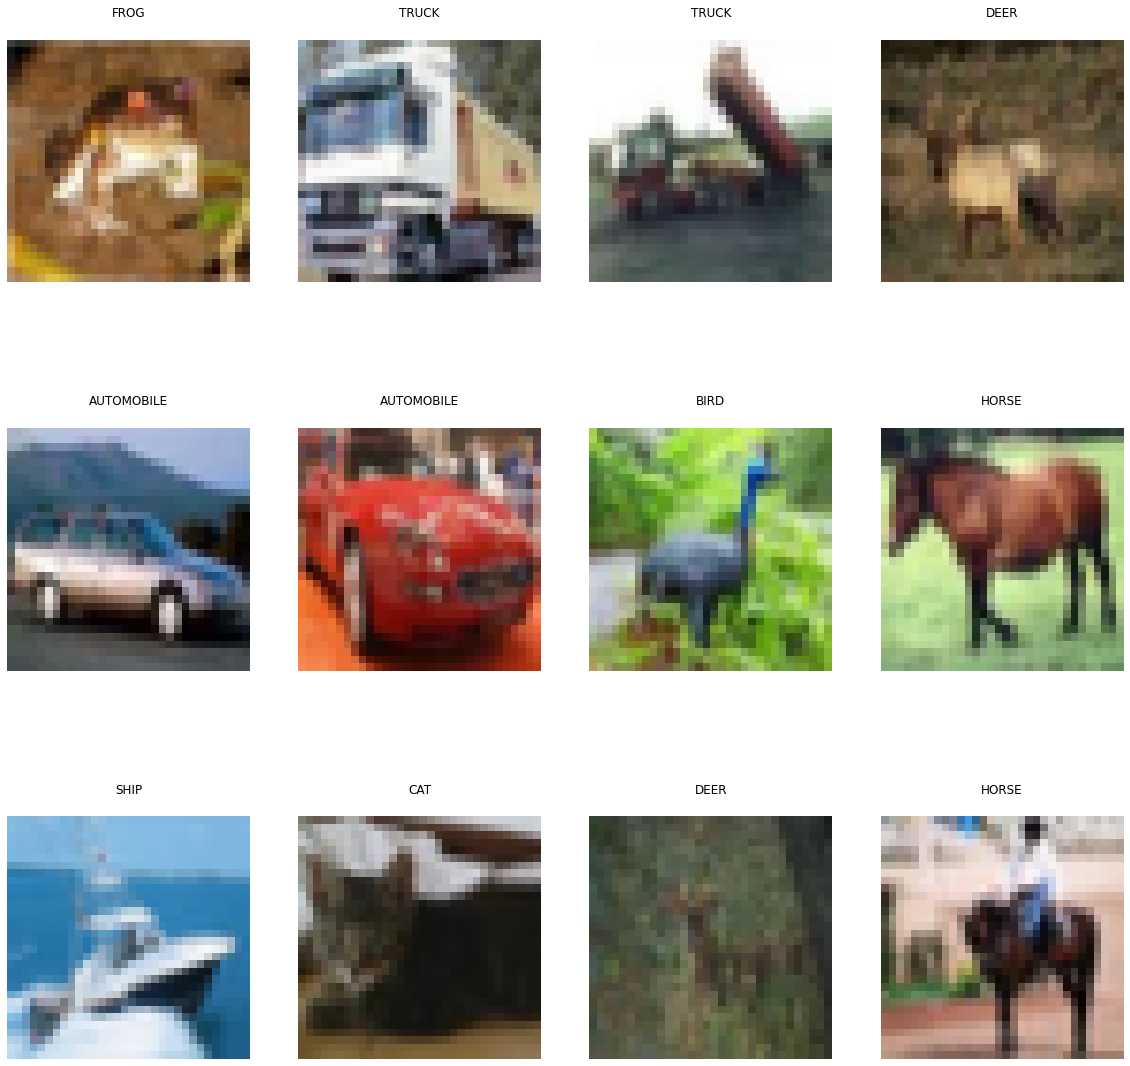

In [8]:
#displaying the dataset
%matplotlib inline
fig,axs = plt.subplots(3,4, figsize=(20,20))
fig.subplots_adjust(hspace = 0.25)
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis("off")
    ax.set_title(objects[y_train[i]])

## Normalizing and Processing the Data

In [9]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
n_classes=10

In [10]:
print("shape before one hot encoding:",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("shape after one hot encoding:",y_train.shape)

shape before one hot encoding: (50000,)
shape after one hot encoding: (50000, 10)


### BUILDING THE MODEL

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Dropout

model = Sequential()
#convolutional layers
model.add(Conv2D(55, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(80, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(200, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))          
model.add(Flatten())

#hiden layer          
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(250, activation="relu"))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10,activation="softmax"))

In [12]:
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=128,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
391/391 [==============================] - 540s 1s/step - loss: 1.5847 - accuracy: 0.4170 - val_loss: 1.1282 - val_accuracy: 0.5952
Epoch 2/25
391/391 [==============================] - 621s 2s/step - loss: 1.0860 - accuracy: 0.6172 - val_loss: 0.9511 - val_accuracy: 0.6709
Epoch 3/25
391/391 [==============================] - 463s 1s/step - loss: 0.8883 - accuracy: 0.6905 - val_loss: 0.8236 - val_accuracy: 0.7109
Epoch 4/25
391/391 [==============================] - 412s 1s/step - loss: 0.7809 - accuracy: 0.7288 - val_loss: 0.7576 - val_accuracy: 0.7359
Epoch 5/25
391/391 [==============================] - 375s 958ms/step - loss: 0.6795 - accuracy: 0.7642 - val_loss: 0.6946 - val_accuracy: 0.7625
Epoch 6/25
391/391 [==============================] - 411s 1s/step - loss: 0.6082 - accuracy: 0.7887 - val_loss: 0.6668 - val_accuracy: 0.7717
Epoch 7/25
391/391 [==============================] - 360s 922ms/step - loss: 0.5424 - accuracy: 0.8093 - val_loss: 0.6604 - val_accuracy: 

In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 39s 124ms/step - loss: 0.7537 - accuracy: 0.7937


[0.7537047266960144, 0.7936999797821045]

### PREDICTING

(-0.5, 31.5, 31.5, -0.5)

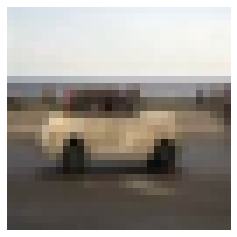

In [14]:
#checking for one image
plt.matshow(x_test[201])
plt.axis("off")

In [15]:
y_predicted=model.predict(x_test)
y_predicted[201]

array([3.7805038e-04, 7.5816047e-01, 2.7688929e-10, 3.2627196e-11,
       5.1441715e-11, 1.1725640e-10, 2.8606148e-10, 2.6962954e-09,
       8.0373748e-06, 2.4145342e-01], dtype=float32)

In [16]:
s=np.argmax(y_predicted[201])
print("The predicted 201th object is:",objects[s])

The predicted 201th object is: AUTOMOBILE


In [17]:
#dictonary of class_lables containing the objects
class_lables=dict(zip(range(0,10),objects))

#smaple of 9 images 
batch=x_test[202:211]
lables=np.argmax(y_test[202:211],axis=-1)

#predicting
predictions=model.predict(batch,verbose = 1)

1/1 [==============================] - 0s 43ms/step


In [18]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[8 7 1 3 0 5 7 9 7]


### OBJECT DETECTION

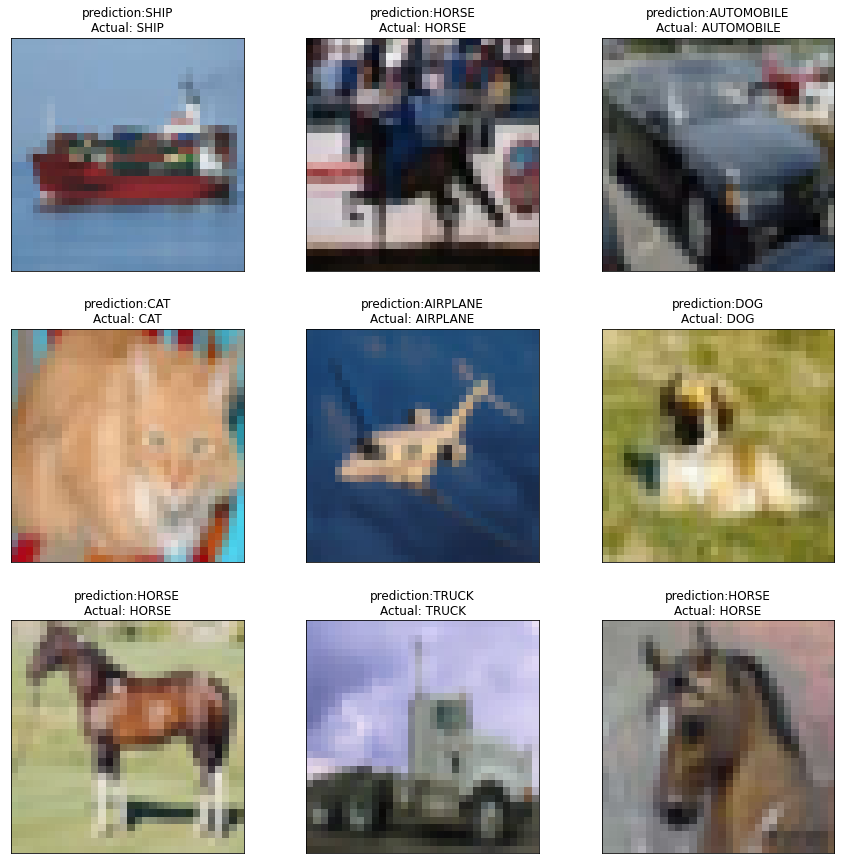

In [19]:
fig,axs = plt.subplots(3,3, figsize=(15,15))
fig.subplots_adjust(hspace = 0.25)
axs=axs.flatten()

for i,img in enumerate(batch):
    for key,value in class_lables.items():
        if class_result[i] == key: 
            title=("prediction:{}\nActual: {}".format(class_lables[key],class_lables[lables[i]]))
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            axs[i].imshow(img)
    
plt.show()